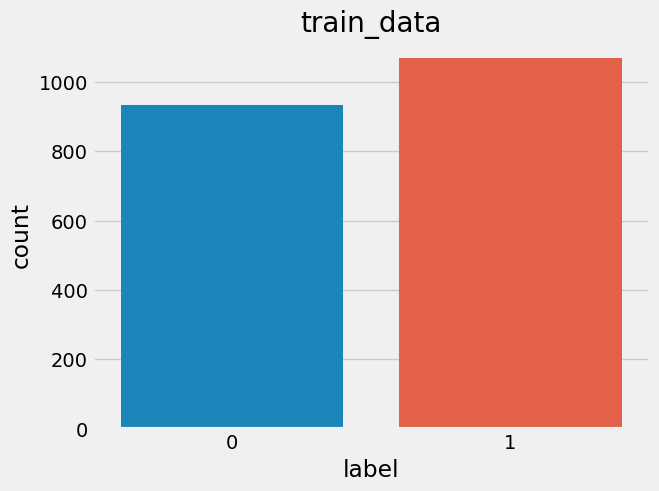

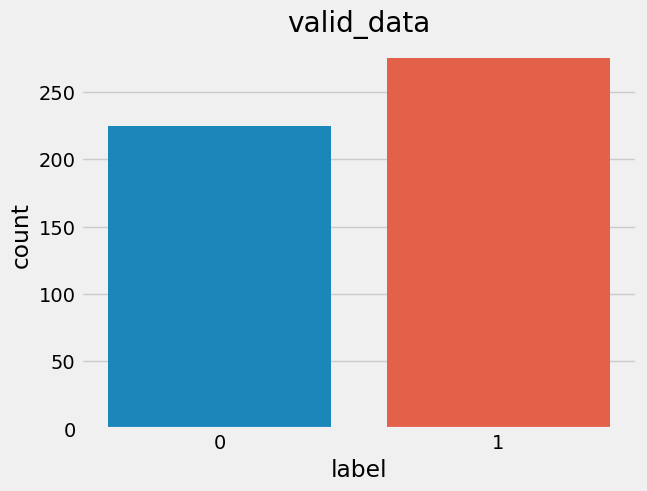

In [2]:
# 导入工具包
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 设置显示风格
plt.style.use('fivethirtyeight')

# 利用pandas读取训练数据和验证数据
train_data = pd.read_csv('train.csv')
valid_data = pd.read_csv('test.csv')

# 获得训练数据标签的数量分布
sns.countplot(x='label', data=train_data)
plt.title('train_data')
plt.show()

# 获得验证数据标签的数量分布
sns.countplot(x='label', data=valid_data)
plt.title('valid_data')
plt.show()

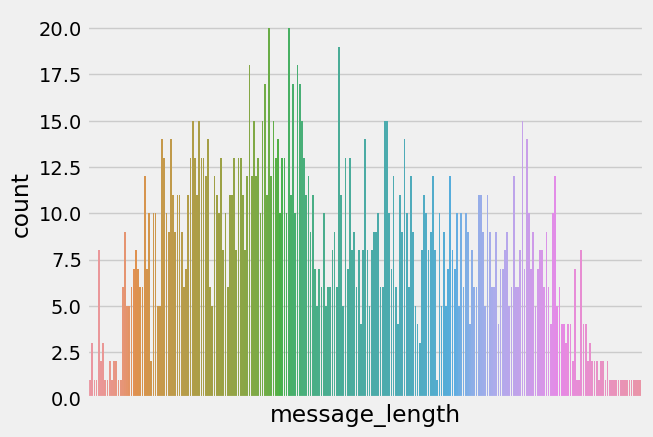

/Users/nancyxie/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


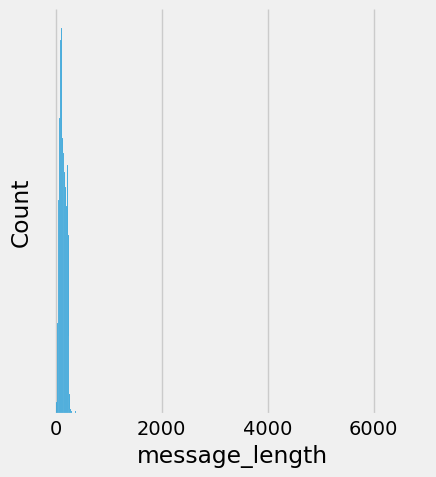

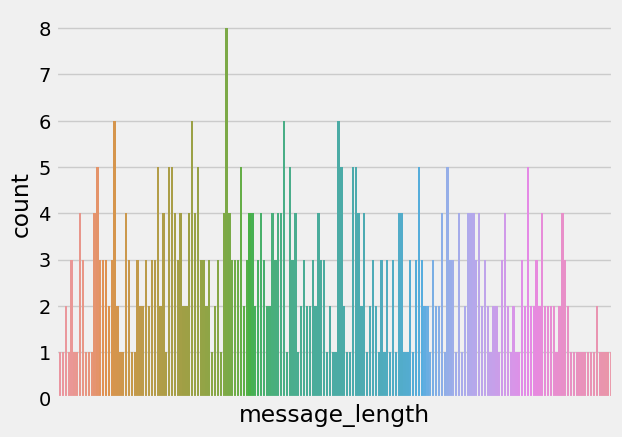

/Users/nancyxie/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


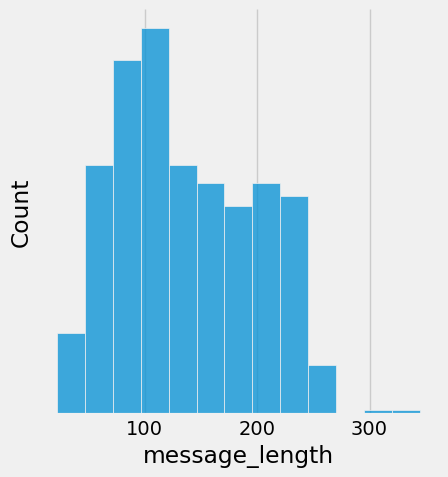

In [3]:
# 在训练数据中添加新的句子长度列，每个元素的值都对应句子的长度
train_data['message_length'] = list(map(lambda x: len(x), train_data['message']))

# 绘制句子长度列的数量分布
sns.countplot(x='message_length', data=train_data)
plt.xticks([])
plt.show()

# 绘制dist长度分布图(柱状图)
sns.displot(train_data['message_length'])
plt.yticks([])
plt.show()

# 在验证数据中添加新的句子长度列，每个元素的值都对应句子的长度
valid_data['message_length'] = list(map(lambda x: len(x), valid_data['message']))

# 绘制句子长度列的数量分布
sns.countplot(x='message_length', data=valid_data)
plt.xticks([])
plt.show()

# 绘制dist长度分布图(柱状图)
sns.displot(valid_data['message_length'])
plt.yticks([])
plt.show()

获取训练集和验证集的正负样本长度散点分布

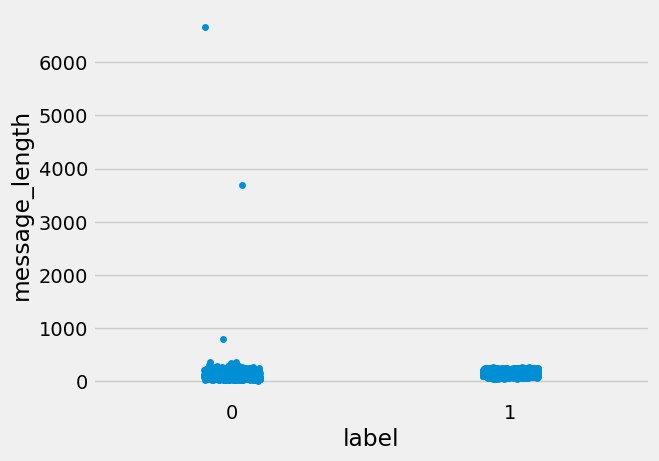

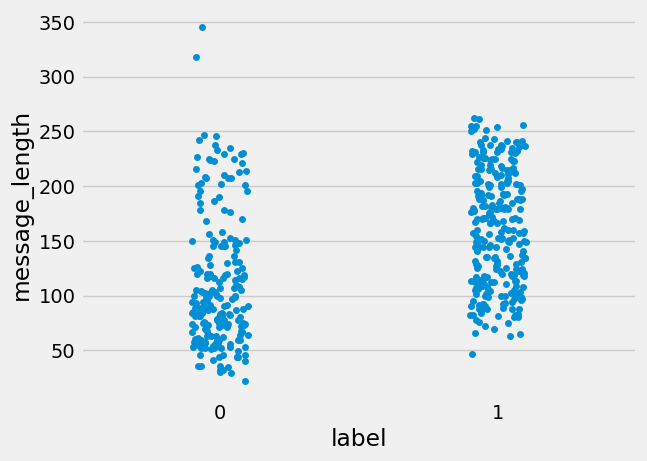

In [4]:
# 绘制训练数据语句长度的散点图
sns.stripplot(y='message_length', x='label', data=train_data)
plt.show()

# 绘制验证数据语句长度的散点图
sns.stripplot(y='message_length', x='label', data=valid_data)
plt.show()

In [5]:
import nltk
from nltk.tokenize import word_tokenize
from itertools import chain
from nltk.corpus import stopwords
import string

nltk.download('punkt')
# 下载停用词集
nltk.download('stopwords')
# 获取英语停用词集
stop_words = set(stopwords.words('english'))

# 对训练集的句子精选分词，并统计出不同词汇的总数
# 分词 + 移除停用词和标点符号
train_tokenized = train_data['message'].apply(lambda x: [word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words])
# 将所有文本的分词结果合并成一个大列表
train_words = list(chain(*train_tokenized))
# 使用set获取所有独特的词汇
train_vocab = set(train_words)
print(f"训练集共包含不同词汇总数为: {len(train_vocab)}")

# 对验证集的句子精选分词，并统计出不同词汇的总数
# 分词 + 移除停用词和标点符号
valid_tokenized = valid_data['message'].apply(lambda x: [word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words])
# 将所有文本的分词结果合并成一个大列表
valid_words = list(chain(*valid_tokenized))
# 使用set获取所有独特的词汇
valid_vocab = set(valid_words)
print(f"验证集共包含不同词汇总数为: {len(valid_vocab)}")

[nltk_data] Downloading package punkt to /Users/nancyxie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nancyxie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


训练集共包含不同词汇总数为: 7069
验证集共包含不同词汇总数为: 2985


生成词云函数

In [6]:
from wordcloud import WordCloud

def generate_wordcloud(adjectives_list, title):
    # 实例化绘制词云的类
    # max_words是图像最多显示多少个词
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='black')
    # 将传入的列表转换成词云生成器需要的字符串形式
    text = ' '.join(adjectives_list)
    # 生成词云
    wordcloud.generate(text)
    # 绘制图像并显示
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

获得形容词的函数

In [7]:
nltk.download('averaged_perceptron_tagger')

def get_adjectives(tokenized, data):
    tagged = tokenized.apply(nltk.pos_tag)
    adjectives = tagged.apply(lambda x: [word for word, tag in x if tag in ['JJ', 'JJR', 'JJS']])
    # 筛选出正样本的形容词
    positive = adjectives[data['label'] == 1]
    positive_flat = list(chain(*positive))
    # 筛选出负样本的形容词
    negative = adjectives[data['label'] == 0]
    negative_flat = list(chain(*negative))
    return positive_flat, negative_flat

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/nancyxie/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


获得训练集上正负的样本的高频形容词词云

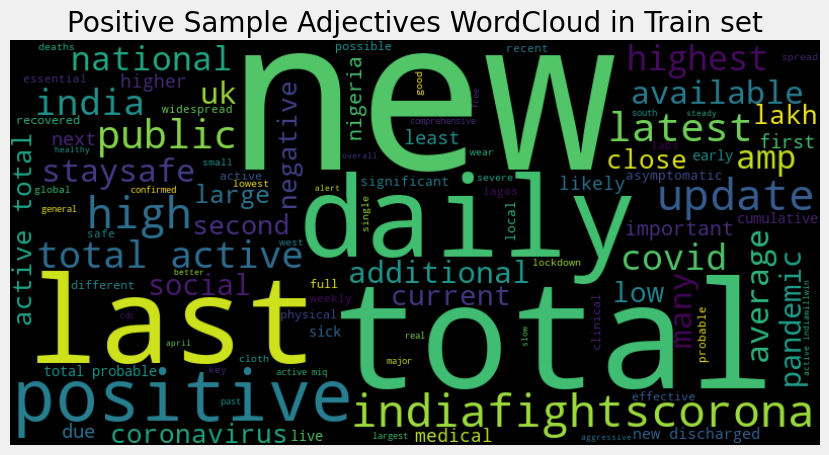

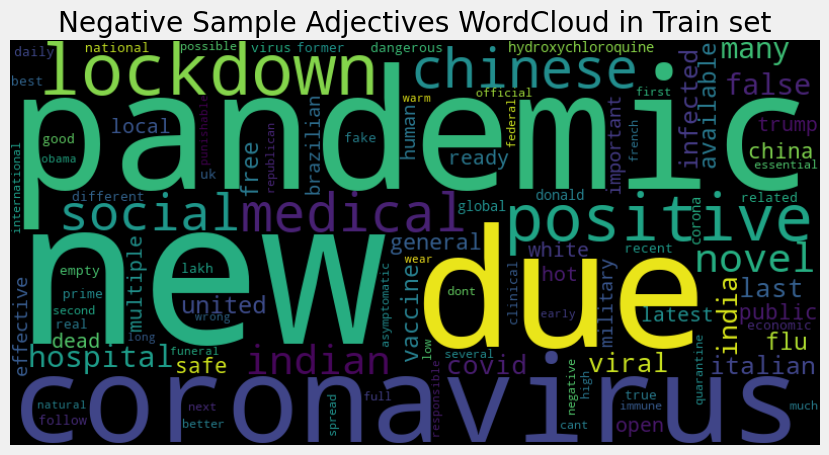

In [8]:
train_positive_flat, train_negative_flat = get_adjectives(train_tokenized, train_data)

# 生成正样本的形容词词云
generate_wordcloud(train_positive_flat, 'Positive Sample Adjectives WordCloud in Train set')

# 生成负样本的形容词词云
generate_wordcloud(train_negative_flat, 'Negative Sample Adjectives WordCloud in Train set')

获得验证集上正负的样本的高频形容词词云

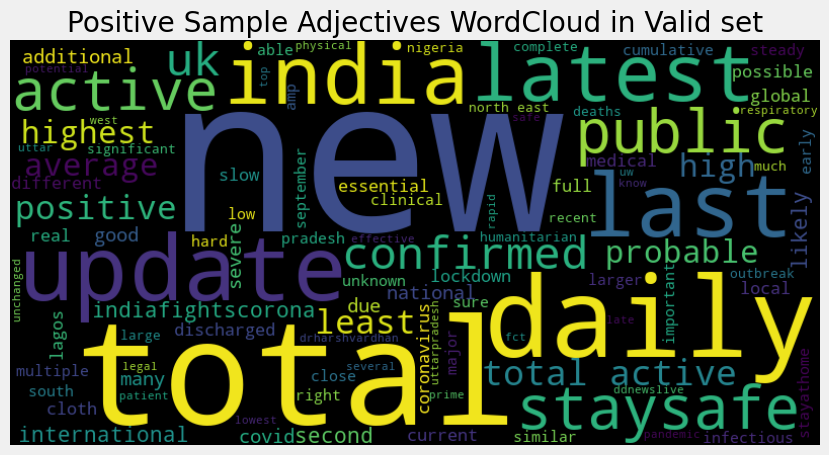

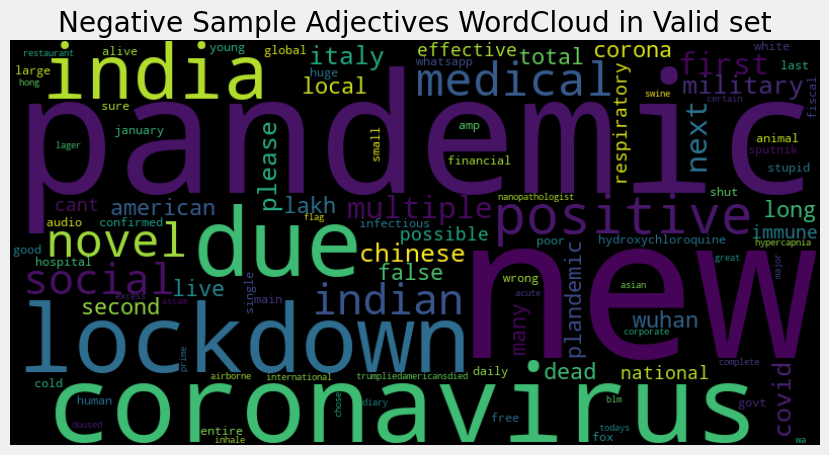

In [9]:
valid_positive_flat, valid_negative_flat = get_adjectives(valid_tokenized, valid_data)

# 生成正样本的形容词词云
generate_wordcloud(valid_positive_flat, 'Positive Sample Adjectives WordCloud in Valid set')

# 生成负样本的形容词词云
generate_wordcloud(valid_negative_flat, 'Negative Sample Adjectives WordCloud in Valid set')

文本长度处理：
- 一般模型的输入需要等尺寸大小的矩阵，因此在进入模型前需要对每条文本数值映射后的长度进行规范，此时将根据句子长度分布分析出覆盖绝大多数文本的合理长度，对超长文本进行截断，对不足文本进行补齐(一般使用数字0)

In [ ]:
ngram_range = 2

def create_ngram_set(input_list):
    return set(zip(*[input_list[i:] for i in range(ngram_range)]))

In [ ]:
from keras.preprocessing import sequence

cutlen = 500

def padding(x_train):
    return sequence.pad_sequences(x_train, cutlen)

x_train = [[1, 2, 4, 5, 7]]

In [10]:
# 导入必要的库
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

# 第一步: 文本长度处理
cutlen = 500  # 设定文本长度上限

# 初始化Tokenizer
tokenizer = Tokenizer()
# 根据训练数据更新词汇索引
tokenizer.fit_on_texts(train_data['message'])

# 将文本转换为序列
train_sequences = tokenizer.texts_to_sequences(train_data['message'])
valid_sequences = tokenizer.texts_to_sequences(valid_data['message'])

# 对序列进行填充或截断
train_padded = pad_sequences(train_sequences, maxlen=cutlen)
valid_padded = pad_sequences(valid_sequences, maxlen=cutlen)

RNN

In [11]:
# 第二步: 构建RNN模型
vocab_size = len(tokenizer.word_index) + 1  # 词汇表大小

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=cutlen))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

# 训练模型 (假定已将标签转换为适合的格式)
model.fit(train_padded, train_data['label'], epochs=5, validation_data=(valid_padded, valid_data['label']))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 100)          975300    
                                                                 
 spatial_dropout1d (Spatial  (None, 500, 100)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1055801 (4.03 MB)
Trainable params: 1055801 (4.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
63/63 [==============================] - 48s 736ms/step - loss: 0.529

CNN

In [12]:
# 导入必要的库
from keras.layers import Conv1D, GlobalMaxPooling1D

# 继续使用之前的Tokenizer处理和文本序列填充代码

# 构建CNN模型
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=cutlen))
model.add(SpatialDropout1D(0.2))
model.add(Conv1D(filters=64, kernel_size=5, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

# 训练模型
model.fit(train_padded, train_data['label'], epochs=5, validation_data=(valid_padded, valid_data['label']))

loss, accuracy = model.evaluate(train_padded, y_test, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 100)          975300    
                                                                 
 spatial_dropout1d_1 (Spati  (None, 500, 100)          0         
 alDropout1D)                                                    
                                                                 
 conv1d (Conv1D)             (None, 496, 64)           32064     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1007429 (3.84 MB)
Trainable params: 1007

MLP

In [13]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

# 假设embeddings_index是一个字典，键是单词，值是对应的嵌入向量
# 例如: embeddings_index = {'the': array([...]), ...}
embeddings_index = {}  # 需要填充这个字典

def text_to_vector(text):
    words = text.split()
    vectors = np.array([embeddings_index.get(word, np.zeros((100,))) for word in words])
    return vectors.mean(axis=0)

# 将训练和验证数据转换为向量
train_vectors = np.array([text_to_vector(text) for text in train_data['message']])
valid_vectors = np.array([text_to_vector(text) for text in valid_data['message']])

# 构建MLP模型
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(100,)))  # 假设嵌入向量大小为100
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型
model.fit(train_vectors, train_data['label'], epochs=5, validation_data=(valid_vectors, valid_data['label']))


Epoch 1/5
63/63 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5330 - val_loss: 0.6918 - val_accuracy: 0.5500
Epoch 2/5
63/63 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5340 - val_loss: 0.6911 - val_accuracy: 0.5500
Epoch 3/5
63/63 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5340 - val_loss: 0.6907 - val_accuracy: 0.5500
Epoch 4/5
63/63 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5340 - val_loss: 0.6901 - val_accuracy: 0.5500
Epoch 5/5
63/63 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5340 - val_loss: 0.6900 - val_accuracy: 0.5500


In [14]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout

# 对文本进行分词和序列化处理
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['message'])
sequences = tokenizer.texts_to_sequences(train_data['message'])
valid_sequences = tokenizer.texts_to_sequences(valid_data['message'])

# 设置序列的统一长度
data = pad_sequences(sequences, maxlen=500)
valid_data_padded = pad_sequences(valid_sequences, maxlen=500)

# 构建MLP模型
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=500))
model.add(Flatten())  # 将嵌入层的输出扁平化以适配MLP
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型
model.fit(data, train_data['label'], epochs=5, validation_data=(valid_data_padded, valid_data['label']))


Epoch 1/5
63/63 [==============================] - 4s 63ms/step - loss: 0.6904 - accuracy: 0.6900 - val_loss: 0.3694 - val_accuracy: 0.8440
Epoch 2/5
63/63 [==============================] - 6s 101ms/step - loss: 0.1635 - accuracy: 0.9480 - val_loss: 0.2692 - val_accuracy: 0.8840
Epoch 3/5
63/63 [==============================] - 8s 125ms/step - loss: 0.0397 - accuracy: 0.9910 - val_loss: 0.2657 - val_accuracy: 0.8880
Epoch 4/5
63/63 [==============================] - 8s 128ms/step - loss: 0.0114 - accuracy: 0.9990 - val_loss: 0.2681 - val_accuracy: 0.8880
Epoch 5/5
63/63 [==============================] - 7s 119ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.2816 - val_accuracy: 0.8860
